# Data Science with Python and Dask
## Chapter 5: Cleaning and Transforming DataFrames

### Intro Section

In [ ]:
% pip install 'fsspec>=0.3.3'

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 140 kB 6.0 MB/s 


In [ ]:
import dask.dataframe as dd
from dask.diagnostics import ProgressBar 
from matplotlib import pyplot as plt  

In [ ]:
% pip install requests
% pip install aiohttp

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.1 MB 7.2 MB/s 
     |████████████████████████████████| 94 kB 3.2 MB/s 
     |████████████████████████████████| 144 kB 48.9 MB/s 
     |████████████████████████████████| 271 kB 20.8 MB/s 


In [ ]:
import numpy as np
dtypes = {
 'date_first_observed': np.str,
 'days_parking_in_effect': np.str,
 'double_parking_violation': np.str,
 'feet_from_curb': np.float32,
 'from_hours_in_effect': np.str,
 'house_number': np.str,
 'hydrant_violation': np.str,
 'intersecting_street': np.str,
 'issue_date': np.str,
 'issuer_code': np.float32,
 'issuer_command': np.str,
 'issuer_precinct': np.float32,
 'issuer_squad': np.str,
 'issuing_agency': np.str,
 'law_section': np.float32,
 'meter_number': np.str,
 'no_standing_or_stopping_violation': np.str,
 'plate_id': np.str,
 'plate_type': np.str,
 'registration_state': np.str,
 'street_code1': np.uint32,
 'street_code2': np.uint32,
 'street_code3': np.uint32,
 'street_name': np.str,
 'sub_division': np.str,
 'summons_number': np.uint32,
 'time_first_observed': np.str,
 'to_hours_in_dffect': np.str,
 'unregistered_vehicle': np.float64,
 'vehicle_body_type': np.str,
 'vehicle_color': np.str,
 'vehicle_expiration_date': np.str,
 'vehicle_make': np.str,
 'vehicle_year': np.float32,
 'violation_code': np.uint16,
 'violation_county': np.str,
 'violation_description': np.str,
 'violation_in_front_of_or_opposite': np.str,
 'violation_legal_code': np.str,
 'violation_location': np.str,
 'violation_post_code': np.str,
 'violation_precinct': np.float32,
 'violation_time': np.str
}


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.str_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.str_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.
/usr/local/lib/pytho

Implicitly set the datatypes when reading the csv files

In [ ]:
df17 = dd.read_csv('https://data.cityofnewyork.us/resource/2bnn-yakx.csv', dtype=dtypes,  blocksize=None)  
df17.compute()

summons_number plate_id registration_state plate_type  \
0         797502185  GZH7067                 NY        PAS   
1         797484362  GZH7067                 NY        PAS   
2         336666088  AVM7975                 NY        PAS   
3        3901589984  GWB7054                 NY        PAS   
4         336217062  EXZ9820                 NY        PAS   
..              ...      ...                ...        ...   
995      4112045887  GKR2178                 NY        PAS   
996      4185041090   AN251V                 NJ        PAS   
997      2779280287  HAV1171                 NY        PAS   
998      3911048336  42268PC                 NY        IRP   
999      3629544930  HNK2852                 PA        PAS   

                  issue_date  violation_code vehicle_body_type vehicle_make  \
0    2016-07-10T00:00:00.000               7              SUBN        TOYOT   
1    2016-07-08T00:00:00.000               7              SUBN        TOYOT   
2    2017-03-09T00:00:00.000              36              SUBN          GMC   
3    2017-01-18T00:00:00.000              70              SUBN        TOYOT   
4    2017-03-02T00:00:00.000              36              4DSD        HONDA   
..                       ...             ...               ...          ...   
995  2016-12-22T00:00:00.000              71              2DSD         MINI   
996  2017-01-23T00:00:00.000              84              REFG        FRUEH   
997  2016-10-15T00:00:00.000              38              4DSD        TOYOT   
998  2016-09-09T00:00:00.000              23              TRAC        FRUEH   
999  2016-09-10T00:00:00.000              38              2DSD        CHEVR   

    issuing_agency  street_code1  ...  vehicle_color  unregistered_vehicle  \
0                V             0  ...             GY                   NaN   
1                V             0  ...             GY                   NaN   
2                V             0  ...             GY                   NaN   
3                T         59590  ...             BL                   NaN   
4                V             0  ...             GR                   NaN   
..             ...           ...  ...            ...                   ...   
995              T         33930  ...             BK                   NaN   
996              T         10610  ...          WHITE                   NaN   
997              T          5580  ...             WH                   NaN   
998              T         61090  ...          WHITE                   NaN   
999              T         11110  ...          SILVE                   NaN   

    vehicle_year meter_number  feet_from_curb  violation_post_code  \
0         2001.0          NaN             0.0                  NaN   
1         2001.0          NaN             0.0                  NaN   
2         2010.0          NaN             0.0                  NaN   
3         2015.0          NaN             0.0                   05   
4         1997.0          NaN             0.0                  NaN   
..           ...          ...             ...                  ...   
995       2014.0          NaN             0.0                 65 1   
996          0.0          NaN             0.0                   99   
997       2002.0          NaN             0.0                 50 3   
998          0.0          NaN             0.0                 12-A   
999          0.0          NaN             0.0                 01 6   

              violation_description no_standing_or_stopping_violation  \
0      FAILURE TO STOP AT RED LIGHT                               NaN   
1      FAILURE TO STOP AT RED LIGHT                               NaN   
2    PHTO SCHOOL ZN SPEED VIOLATION                               NaN   
3    70A-Reg. Sticker Expired (NYS)                               NaN   
4    PHTO SCHOOL ZN SPEED VIOLATION                               NaN   
..                              ...                               ...   
995  71A-Insp Sticker 

Read the rest of the csv files

In [ ]:
df16 = dd.read_csv('https://data.cityofnewyork.us/resource/kiv2-tbus.csv', dtype=dtypes, blocksize=None)   
df15 = dd.read_csv('https://data.cityofnewyork.us/resource/c284-tqph.csv', dtype=dtypes, blocksize=None)
df14 = dd.read_csv('https://data.cityofnewyork.us/resource/jt7v-77mi.csv', dtype=dtypes, blocksize=None)



Check if the datatype is set correctly

In [ ]:
df16['unregistered_vehicle']

Dask Series Structure:
npartitions=1
    float64
        ...
Name: unregistered_vehicle, dtype: float64
Dask Name: getitem, 4 tasks

Combine in one dataframe


In [ ]:
nyc_data_raw = df17
nyc_data_raw = nyc_data_raw.append(df16)
nyc_data_raw = nyc_data_raw.append(df15)
nyc_data_raw = nyc_data_raw.append(df14)

In [ ]:
# Listing 5.1
import dask.dataframe as dd
from dask.diagnostics import ProgressBar


### Section 5.1.1

In [ ]:
# Listing 5.2
with ProgressBar():
    display(nyc_data_raw['plate_id'].head())

[########################################] | 100% Completed |  2.1s


0    GZH7067
1    GZH7067
2    AVM7975
3    GWB7054
4    EXZ9820
Name: plate_id, dtype: object

select multiple columns - comma separate the column names head() - show the top 5 rows (by default) head(10) - show the top 10 rows
Double up on the square brackets - creating an inline list of strings. To get multiple columns back, pass a list of column names 
(as strings) to the column selector.

In [ ]:
# Listing 5.3
with ProgressBar():
    display(nyc_data_raw[['plate_id', 'registration_state']].head())

[########################################] | 100% Completed |  2.5s


plate_id registration_state
0  GZH7067                 NY
1  GZH7067                 NY
2  AVM7975                 NY
3  GWB7054                 NY
4  EXZ9820                 NY

Provide a list of column names that is stored in a variable.
If we pass a column name to the column selector that doesn’t exist in the DataFrame, Dask will return a Key Error.

In [ ]:
# Listing 5.4
columns_to_select = ['plate_id', 'registration_state']

with ProgressBar():
    display(nyc_data_raw[columns_to_select].head())

[########################################] | 100% Completed |  2.5s


plate_id registration_state
0  GZH7067                 NY
1  GZH7067                 NY
2  AVM7975                 NY
3  GWB7054                 NY
4  EXZ9820                 NY

### Section 5.1.2


Instead of selecting a small subset of columns, want to keep all but a few columns. 

Use drop() to drop unwanted columns. 
Drop method accepts either a single string or a list of strings representing column names that you wish to drop. 

Only works for axis=1 (y or column). axis 0 means x-axis or row.
When to use drop, or column selector? -- It depends on how many columns to drop or select. It is an performance consideration.

In [ ]:
# Listing 5.5
with ProgressBar():
    display(nyc_data_raw.drop('violation_code', axis=1).head())

[########################################] | 100% Completed |  2.6s


summons_number plate_id registration_state plate_type  \
0       797502185  GZH7067                 NY        PAS   
1       797484362  GZH7067                 NY        PAS   
2       336666088  AVM7975                 NY        PAS   
3      3901589984  GWB7054                 NY        PAS   
4       336217062  EXZ9820                 NY        PAS   

                issue_date vehicle_body_type vehicle_make issuing_agency  \
0  2016-07-10T00:00:00.000              SUBN        TOYOT              V   
1  2016-07-08T00:00:00.000              SUBN        TOYOT              V   
2  2017-03-09T00:00:00.000              SUBN          GMC              V   
3  2017-01-18T00:00:00.000              SUBN        TOYOT              T   
4  2017-03-02T00:00:00.000              4DSD        HONDA              V   

   street_code1  street_code2  ...  vehicle_color unregistered_vehicle  \
0             0             0  ...             GY                  NaN   
1             0             0  ...             GY                  NaN   
2             0             0  ...             GY                  NaN   
3         59590          8590  ...             BL                  NaN   
4             0             0  ...             GR                  NaN   

  vehicle_year  meter_number  feet_from_curb  violation_post_code  \
0       2001.0           NaN             0.0                  NaN   
1       2001.0           NaN             0.0                  NaN   
2       2010.0           NaN             0.0                  NaN   
3       2015.0           NaN             0.0                   05   
4       1997.0           NaN             0.0                  NaN   

            violation_description no_standing_or_stopping_violation  \
0    FAILURE TO STOP AT RED LIGHT                               NaN   
1    FAILURE TO STOP AT RED LIGHT                               NaN   
2  PHTO SCHOOL ZN SPEED VIOLATION                               NaN   
3  70A-Reg. Sticker Expired (NYS)                               NaN   
4  PHTO SCHOOL ZN SPEED VIOLATION                               NaN   

  hydrant_violation double_parking_violation  
0               NaN                      NaN  
1               NaN                      NaN  
2               NaN                      NaN  
3               NaN                      NaN  
4               NaN                      NaN  

[5 rows x 42 columns]

specifying multiple columns in the column selector, you can specify multiple columns to drop. e.g. drop any columns that contain the word "Violation" in the column name.

defined an anonymous function (lambda) to check each column name for the presence of “Violation” and applied that to the nyc_data_raw.columns list

In [ ]:
# Listing 5.6
violationColumnNames = list(filter(lambda columnName: 'violation' in columnName, nyc_data_raw.columns))

with ProgressBar():
    display(nyc_data_raw.drop(violationColumnNames, axis=1).head())

[########################################] | 100% Completed |  2.9s


summons_number plate_id registration_state plate_type  \
0       797502185  GZH7067                 NY        PAS   
1       797484362  GZH7067                 NY        PAS   
2       336666088  AVM7975                 NY        PAS   
3      3901589984  GWB7054                 NY        PAS   
4       336217062  EXZ9820                 NY        PAS   

                issue_date vehicle_body_type vehicle_make issuing_agency  \
0  2016-07-10T00:00:00.000              SUBN        TOYOT              V   
1  2016-07-08T00:00:00.000              SUBN        TOYOT              V   
2  2017-03-09T00:00:00.000              SUBN          GMC              V   
3  2017-01-18T00:00:00.000              SUBN        TOYOT              T   
4  2017-03-02T00:00:00.000              4DSD        HONDA              V   

   street_code1  street_code2  ...  law_section sub_division  \
0             0             0  ...       1111.0            D   
1             0             0  ...       1111.0            D   
2             0             0  ...       1180.0            B   
3         59590          8590  ...        408.0           j3   
4             0             0  ...       1180.0            B   

   days_parking_in_effect  from_hours_in_effect to_hours_in_effect  \
0                     NaN                   NaN                NaN   
1                     NaN                   NaN                NaN   
2                     NaN                   NaN                NaN   
3                 YYYYYYY                   NaN                NaN   
4                     NaN                   NaN                NaN   

  vehicle_color unregistered_vehicle vehicle_year meter_number feet_from_curb  
0            GY                  NaN       2001.0          NaN            0.0  
1            GY                  NaN       2001.0          NaN            0.0  
2            GY                  NaN       2010.0          NaN            0.0  
3            BL                  NaN       2015.0          NaN            0.0  
4            GR                  NaN       1997.0          NaN            0.0  

[5 rows x 31 columns]

### Section 5.1.3

Rename column to give it a more descriptive name.

The columns argument simply takes a dictionary where the key is the old column name and the value is the new column name. 
Dask will make a one-for-one swap.

These operations are not altering the source data on disk, only the data that Dask holds in memory. 

Dask will make a one-for-one swap, returning a DataFrame with the new column names. Columns that aren’t specified in the dictionary will not be renamed or dropped.

In [ ]:
# Listing 5.7
nyc_data_renamed = nyc_data_raw.rename(columns={'plate_id':'License Plate'})
nyc_data_renamed

Dask DataFrame Structure:
              summons_number License Plate registration_state plate_type issue_date violation_code vehicle_body_type vehicle_make issuing_agency street_code1 street_code2 street_code3 vehicle_expiration_date violation_location violation_precinct issuer_precinct issuer_code issuer_command issuer_squad violation_time time_first_observed violation_county violation_in_front_of_or_opposite house_number street_name intersecting_street date_first_observed law_section sub_division violation_legal_code days_parking_in_effect from_hours_in_effect to_hours_in_effect vehicle_color unregistered_vehicle vehicle_year meter_number feet_from_curb violation_post_code violation_description no_standing_or_stopping_violation hydrant_violation double_parking_violation
npartitions=4                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       
                      uint32        object             object     object     object         uint16            object       object         object       uint32       uint32       uint32                  object             object            float32         float32     float32         object       object         object              object           object                            object       object      object              object              object     float32       object               object                 object               object             object        object              float64      float32       object        float32              object                object                            object            object                   object
                         ...           ...                ...        ...        ...            ...               ...          ...            ...          ...          ...          ...                     ...                ...                ...             ...         ...            ...          ...            ...                 ...              ...                               ...          ...         ...                 ...                 ...         ...          ...                  ...                    ...                  ...                ...           ...                  ...          ...          ...            ...                 ...                   ...                               ...               ...                      ...
                         ...           ...                ...        ...        ...            ...               ...          ...            ...          ...          ...          ...                     ...                ...                ...             ...         ...            ...          ...            ...                 ...              ...                               ...          ...         ...                 ...                 ...         ...          ...                  ...                    ...                  ...                ...           ...                  ...          ...          ...            ...                 ...                   ...                               ...               ...                      ...
                         ...           ...                ...        ...        ...            ...               ...          ...            ...          ...          ...          ...      

### Section 5.1.4

Select data across the rows axis.

There are situations where you know the range of rows you want to retrieve ahead of time, in which case selecting by index is the appropriate way to get the data.  e.g. if the data is indexed by timestamp - you may want to get all rows that occurred between April 2015 and November 2015

Dask stores and partitions data sorted in order of the index. Dask doesn't need to scan and sort index.

The following example selects rows by the default numberic index.

In [ ]:
# Listing 5.8
with ProgressBar():
    display(nyc_data_raw.loc[56].head(1))

[########################################] | 100% Completed |  2.5s


summons_number plate_id registration_state plate_type  \
56      3988081146   PN6B5W                 MO        PAS   

                 issue_date  violation_code vehicle_body_type vehicle_make  \
56  2016-11-03T00:00:00.000              19              SUBN        LINCO   

   issuing_agency  street_code1  ...  vehicle_color  unregistered_vehicle  \
56              T         18520  ...          WHITE                   NaN   

   vehicle_year meter_number  feet_from_curb  violation_post_code  \
56          0.0          NaN             0.0                 22 2   

     violation_description no_standing_or_stopping_violation  \
56  19-No Stand (bus stop)                               NaN   

   hydrant_violation double_parking_violation  
56               NaN                      NaN  

[1 rows x 43 columns]

Unlike the column selector, however, it will not accept a list of values. You can either pass it a single value or a range of values using Python’s standard slice notation.

In [ ]:
# Listing 5.9
with ProgressBar():
    display(nyc_data_raw.loc[100:200].head(100))

[########################################] | 100% Completed |  2.6s


summons_number  plate_id registration_state plate_type  \
100      3988083847   GBT5896                 NY        PAS   
101       798490488    DTZ584                 SC        PAS   
102      4207798720   FYC5422                 NY        PAS   
103      4130549573    KDAE59                 NJ        PAS   
104      4078068310   2237891                 ME        PAS   
..              ...       ...                ...        ...   
195      4257685034   GBJ1668                 NY        PAS   
196       332546485   HFJ3860                 NY        PAS   
197      4184932975  T687292C                 NY        OMT   
198       800284904   HJJ4891                 NY        PAS   
199      4007243189   EYD9934                 NY        PAS   

                  issue_date  violation_code vehicle_body_type vehicle_make  \
100  2016-11-16T00:00:00.000              21              2DSD        ACURA   
101  2016-09-12T00:00:00.000               7                SU          GMC   
102  2017-02-23T00:00:00.000              14              SUBN        HONDA   
103  2016-09-26T00:00:00.000              21              PICK          GMC   
104  2017-04-28T00:00:00.000              66              TRLR        NS/OT   
..                       ...             ...               ...          ...   
195  2017-05-10T00:00:00.000              74              SUBN        ME/BE   
196  2016-11-28T00:00:00.000              36              SUBN        SATUR   
197  2016-11-18T00:00:00.000               9              4DSD        TOYOT   
198  2017-02-07T00:00:00.000               7              4DSD        TOYOT   
199  2017-05-11T00:00:00.000               5              4DSD        CHEVR   

    issuing_agency  street_code1  ...  vehicle_color  unregistered_vehicle  \
100              T         21125  ...             WH                   NaN   
101              V             0  ...            NaN                   NaN   
102              T          8980  ...             BL                   NaN   
103              T         18490  ...          WHITE                   NaN   
104              T             0  ...          WHITE                   NaN   
..             ...           ...  ...            ...                   ...   
195              T             0  ...             GY                   NaN   
196              V             0  ...             GR                   NaN   
197              T         17730  ...             BK                   NaN   
198              V             0  ...             BK                   NaN   
199              V             0  ...             BL                   NaN   

    vehicle_year meter_number  feet_from_curb  violation_post_code  \
100       2004.0          NaN             0.0                 D 22   
101       2005.0          NaN             0.0                  NaN   
102       2015.0          NaN             0.0                   43   
103          0.0          NaN             0.0                 01 7   
104          0.0          NaN             0.0                    Q   
..           ...          ...             ...                  ...   
195       2011.0          NaN             0.0                    T   
196       2007.0          NaN             0.0                  NaN   
197       2016.0          NaN             0.0                 09 6   
198       2016.0          NaN             0.0                  NaN   
199       2009.0          NaN             0.0                  NaN   

              violation_description no_standing_or_stopping_violation  \
100    21-No Parking (street clean)                               NaN   
101    FAILURE TO STOP AT RED LIGHT                               NaN   
102                  14-No Standing                               NaN   
103    21-No Parking (street clean)                               NaN   
104             66-Detached Trailer                               NaN   
..                              ...                               ...   
195       

drop() function does not work across the rows axis, so there’s no way to select just rows 1, 3, and 5, for example, without using filtering. You can, however, retrieve the slice you want to reduce further from Dask and use Pandas to do the final filtering. The example below select every other row.

head() triggers computation in Dask.

In [ ]:
# Listing 5.10
with ProgressBar():
    some_rows = nyc_data_raw.loc[100:200].head(100)
some_rows.drop(range(100, 200, 2))

[########################################] | 100% Completed |  2.5s


summons_number  plate_id registration_state plate_type  \
101       798490488    DTZ584                 SC        PAS   
103      4130549573    KDAE59                 NJ        PAS   
105      4229498659   GUW5336                 NY        PAS   
107      1422580209   GPF2056                 NY        PAS   
109      4177300944   68460JT                 NY        COM   
111      4006405224   GJA9261                 NY        PAS   
113      1410713957   FPE3871                 NY        PAS   
115       329674311   39465MJ                 NY        COM   
117       332278350   FXS9543                 NY        PAS   
119       328706390   GHM9826                 NY        PAS   
121       799380983   GMW1054                 NY        PAS   
123      4216240352   EKU6217                 NY        PAS   
125      4002559474   GTM6841                 NY        PAS   
127       334488904   GKU5278                 NY        PAS   
129      2752975052   GHT4612                 NY        PAS   
131      3998065317   GEK1252                 NY        PAS   
133      3911051814   FPJ2831                 NY        PAS   
135      2862895812   HHU2069                 NY        PAS   
137      4141542573   27131MH                 NY        COM   
139      3395825262   HCU3054                 NY        PAS   
141      3350618069   HKB1593                 NY        PAS   
143      1416467350    648ZGJ                 CT        PAS   
145      3811056883    AP501F                 NJ        PAS   
147      4259042218   HAL4355                 NY        PAS   
149      4255952787    MWL191                 SC        PAS   
151      1414662397   12399MG                 NY        COM   
153      4182998057   20318TC                 NY        TRC   
155      4126552871   70144MG                 NY        COM   
157      4190033909   25434MB                 NY        COM   
159       800151144   GTC1972                 NY        PAS   
161       337886924   FEW2804                 NY        PAS   
163      3982073724   GZR3681                 NY        PAS   
165      4235496002    T81FVR                 NJ        PAS   
167       338809552   DZR9890                 NY        PAS   
169      4196697581     443LC                 FL        PAS   
171      4209858609    S64GKS                 NJ        PAS   
173      4189884165   PEZ1867                 MN        PAS   
175      4170549378    591067                 RI        PAS   
177      2882059718   HKB6427                 NY        PAS   
179      3899063306   CML9030                 NY        PAS   
181      2745736672    N22GRF                 NJ        PAS   
183      3423327701   GGK6604                 NY        PAS   
185      1418677735    XERL84                 NJ        PAS   
187       330091992   GZJ8527                 NY        PAS   
189      4006508827   24873MG                 NY        COM   
191      4048059125   GSS6502                 NY        PAS   
193      4225203800   FPE6209                 NY        PAS   
195      4257685034   GBJ1668                 NY        PAS   
197      4184932975  T687292C                 NY        OMT   
199      4007243189   EYD9934                 NY        PAS   

                  issue_date  violation_code vehicle_body_type vehicle_make  \
101  2016-09-12T00:00:00.000               7                SU          GMC   
103  2016-09-26T00:00:00.000              21              PICK          GMC   
105  2017-05-06T00:00:00.000              71              SUBN        CHEVR   
107  2017-05-18T00:00:00.000              21               SDN          KIA   
109  2016-12-20T00:00:00.000              48               VAN        CHEVR   
111  2016-09-21T00:00:00.000               5              4DSD          BMW   
113  2016-07-02T00:00:00.000              21               SDN        INFIN   
115  2016-10-07T00:00:00.000              36               VAN        CHEVR   
117  2016-11-22T00:00:00.000              36              4DSD          KIA   
1

## 5.2 Dealing with Missing values


Datasets that have missing values due to deficiencies in the data collection process, evolving needs over time, or data processing and storage issues. Whatever the cause, you’ll need to decide what to do to eliminate these data-quality issues.

Options: (depends on context and domain of the problem)
- Remove the rows/columns with missing data from your dataset.
- Assign the missing values a default value.
- Impute the missing values e.g. mean

For example, imagine that you have a dataset containing height measurements of various people, and a few of those height measurements are missing. Depending on the objectives of your analysis, you could decide to either throw out the records with missing height measurements or assume that those people are about average height by finding the arithmetic mean of the measurements you have.

A good rule of thumb is to work with the stakeholders who will be interpreting and using your analyses to come up with an agreed-upon approach that makes the most sense in the context of the problem you’re trying to solve.

### Section 5.2.1

The isnull() method scans each row and returns True if a missing value is found and False if a missing value isn’t found. The sum() method counts up all the True values to give us a total count of missing rows per column. We then take that Series of counts and divide it by the number of rows in the DataFrame

In [ ]:
# Listing 5.11
missing_values = nyc_data_raw.isnull().sum()
with ProgressBar():
    percent_missing = ((missing_values / nyc_data_raw.index.size) * 100).compute()
percent_missing

[########################################] | 100% Completed |  4.0s


summons_number                         0.000
plate_id                               0.000
registration_state                     0.000
plate_type                             0.000
issue_date                             0.000
violation_code                         0.000
vehicle_body_type                      1.125
vehicle_make                           2.400
issuing_agency                         0.000
street_code1                           0.000
street_code2                           0.000
street_code3                           0.000
vehicle_expiration_date               24.975
violation_location                     5.850
violation_precinct                     0.000
issuer_precinct                        0.000
issuer_code                            0.000
issuer_command                         4.900
issuer_squad                           4.900
violation_time                         0.775
time_first_observed                   91.750
violation_county                       4.200
violation_

### Section 5.2.2 Dropping columns with missing values

Dropping columns with more than 50% missing values.

Filtering the percent_missing Series to find the names of the columns that have 50% or more missing values. 

Good idea to drop columns with a lot of missing values. For example, 99%.

In [ ]:
# Listing 5.12
columns_to_drop = list(percent_missing[percent_missing >= 50].index)
nyc_data_clean_stage1 = nyc_data_raw.drop(columns_to_drop, axis=1)

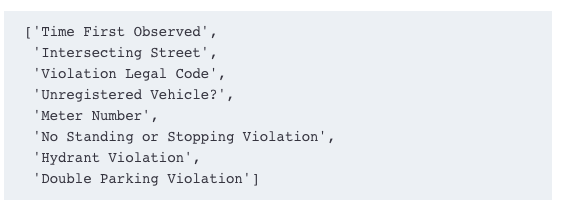

### Section 5.2.3 Imputing missng values


Columns that only have a small amount of missing data, it’s more appropriate to discard the rows that have missing data.

Count of vehicle colors to find common colors

Fill in missing colors by filling in most common columns.

In [ ]:
# Listing 5.13
with ProgressBar():
    count_of_vehicle_colors = nyc_data_clean_stage1['vehicle_color'].value_counts().compute()
most_common_color = count_of_vehicle_colors.sort_values(ascending=False).index[0]

# Fill missing vehicle color with the most common color
nyc_data_clean_stage2 = nyc_data_clean_stage1.fillna({'vehicle_color': most_common_color})

[########################################] | 100% Completed |  6.2s


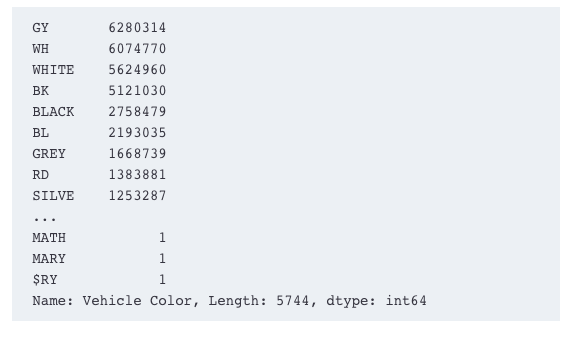

### Section 5.2.4 Dropping rows with missing value

Dropping rows with missing data.

Subset argument specifies which columns to check for null values

In [ ]:
# Listing 5.14
rows_to_drop = list(percent_missing[(percent_missing > 0) & (percent_missing < 5)].index)
nyc_data_clean_stage3 = nyc_data_clean_stage2.dropna(subset=rows_to_drop)

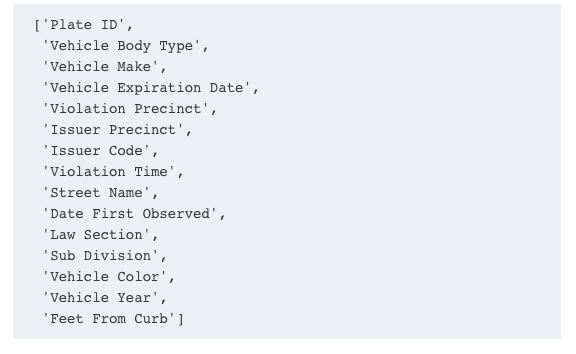

we’re not going to drop these columns! We’re just going to drop any rows from our DataFrame that have missing values in these columns.

If we don’t specify any arguments, dropna will drop all rows with any missing value.


### Section 5.2.5 Imputing multiple columns with missing values


Fill in remaining columns that have missing data with default values. One thing we’ll need to make sure of is that the default 
value we set for a column is appropriate for that column’s datatype.
For any columns that have more than 5% missing values and less than 50% missing values, we’ll fill the missing values with a default value. 

In [ ]:
# Listing 5.15
remaining_columns_to_clean = list(percent_missing[(percent_missing >= 5) & (percent_missing < 50)].index)
nyc_data_raw.dtypes[remaining_columns_to_clean]

vehicle_expiration_date               object
violation_location                    object
violation_in_front_of_or_opposite     object
house_number                          object
days_parking_in_effect                object
from_hours_in_effect                  object
to_hours_in_effect                    object
unregistered_vehicle                 float64
meter_number                          object
dtype: object

String columns are displayed as object instead of np.str. This is just cosmetic—Dask only explicitly shows numeric (int, float, and so on) 
datatypes. Any non-numeric datatypes will show as object. 

Build a dictionary -  taking each value in the remaining_columns_to_clean list and spitting out a tuple of the column name and the string “Unknown.” 

Finally, we convert the list of tuples to a dictionary, which yields an object 


In [ ]:
# Listing 5.16
unknown_default_dict = dict(map(lambda columnName: (columnName, 'Unknown'), remaining_columns_to_clean))

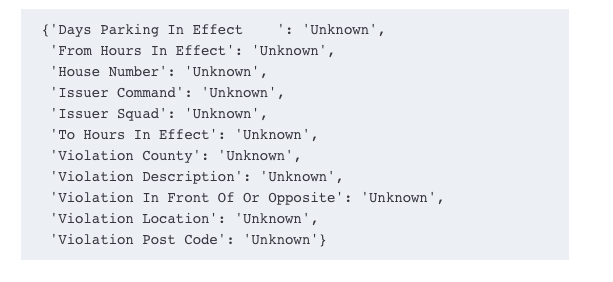

In [ ]:
# Listing 5.17
nyc_data_clean_stage4 = nyc_data_clean_stage3.fillna(unknown_default_dict)

In [ ]:
# Listing 5.18
with ProgressBar():
    print(nyc_data_clean_stage4.isnull().sum().compute())
    nyc_data_clean_stage4.persist()

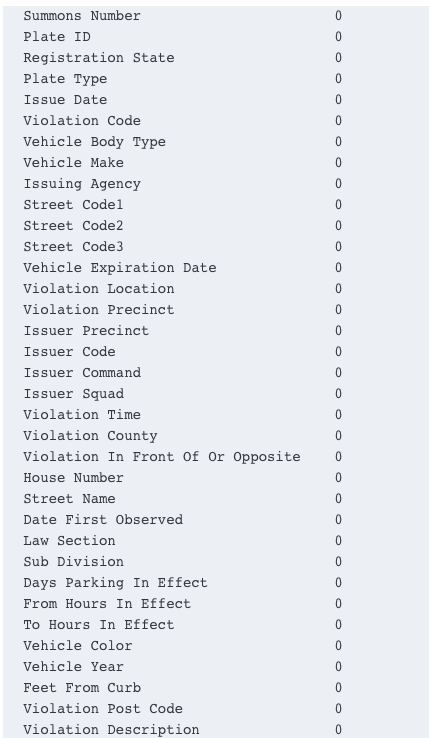

### Section 5.3 Recoding data 

Some data is not missing but the valid is not valid. For example, Rocky Road color is suspectable.

Clean up  data anomalies
- recoding those values to a more likely choice (such as the most frequent value or arithmetic mean) or 
- placing the anomalous data in an Other category. 

The following example take a distinct count of all the license plate types that have been recorded over the past four years. 
The Plate Type column records whether the vehicle in question was a passenger vehicle, commercial vehicle, and so forth.

Take a distinct count of all the license plate types that have been recorded over the past four years. The Plate Type column records whether the vehicle in question was a passenger vehicle, commercial vehicle, and so forth.

In [ ]:
# Listing 5.19
with ProgressBar():
    license_plate_types = nyc_data_clean_stage4['plate_type'].value_counts().compute()
license_plate_types

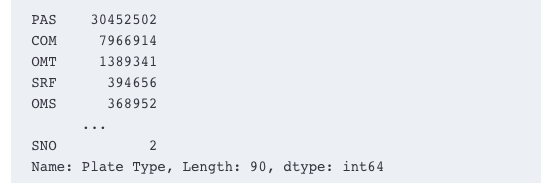

Most of them are PAS (passenger) and COM (commerical) ~ 92%, and 90 distinct other types - collapse them in other category.

=======================================================


Build a Boolean condition that we’ll use to compare with each row. Return a series of True and False.

The where method keeps the existing value for all rows that are True and replaces any rows that are False with the value passed in the second argument.

This means that any row that doesn’t have a Plate Type of PAS or COM will have its Plate Type replaced with Other.

Assign method to add the Series to the DataFrame as a new column.


In [ ]:
# Listing 5.20
condition = nyc_data_clean_stage4['Plate Type'].isin(['PAS', 'COM'])
plate_type_masked = nyc_data_clean_stage4['Plate Type'].where(condition, 'Other')
nyc_data_recode_stage1 = nyc_data_clean_stage4.drop('Plate Type', axis=1)
nyc_data_recode_stage2 = nyc_data_recode_stage1.assign(PlateType=plate_type_masked)
nyc_data_recode_stage3 = nyc_data_recode_stage2.rename(columns={'PlateType':'Plate Type'})

In [ ]:
# Listing 5.21
with ProgressBar():
    display(nyc_data_recode_stage3['Plate Type'].value_counts().compute())

PAS      30452502

COM       7966914

Other     3418586

Name: Plate Type, dtype: int64

Mask method 
- same as the where method, but with one key difference: the where method replaces values when the condition passed to it evaluates False, 
- mask method replaces values when the condition passed to it evaluates True.

The dataset contains more than 5,744 unique colors, but it looks like some colors are quite strange. About 50% with single color. 

- Reduce the number of unique colors by putting all the single-color entries in a category called Other.
- Build a series of TRUE/FALSE. True for any rows that have one of the unique colors and False for rows that don’t.
- Pass this condition into the mask method along with the alternative value of Other
- all rows that have one of the unique colors will be replaced with Other, and the rows that don’t will retain their original value.


In [ ]:
# Listing 5.22
single_color = list(count_of_vehicle_colors[count_of_vehicle_colors == 1].index)
condition = nyc_data_clean_stage4['Vehicle Color'].isin(single_color)
vehicle_color_masked = nyc_data_clean_stage4['Vehicle Color'].mask(condition, 'Other')
nyc_data_recode_stage4 = nyc_data_recode_stage3.drop('Vehicle Color', axis=1)
nyc_data_recode_stage5 = nyc_data_recode_stage4.assign(VehicleColor=vehicle_color_masked)
nyc_data_recode_stage6 = nyc_data_recode_stage5.rename(columns={'VehicleColor':'Vehicle Color'})

where and mask are similar in functionality and pereformance.

Guidelines:
- If you have many unique values, but you want to keep only a few around, using the where method is more convenient. 
- if you have many unique values but you want to get rid of only a few of them, using the mask method is more convenien

### Section 5.4 Elementwise Operations

Parse the issue date column
- import datetime library
- select Issue date column and use apply to perform transformation: 
    - create an anoymous (lambda) function takes a value from the input Series
    - runs it through the datetime.strptime function, returns a parsed dateTime object
    - drop the origin column
    - create a new column and rename the column name

In [ ]:
# Listing 5.23
from datetime import datetime
issue_date_parsed = nyc_data_recode_stage6['Issue Date'].apply(lambda x: datetime.strptime(x, "%m/%d/%Y"), meta=datetime)
nyc_data_derived_stage1 = nyc_data_recode_stage6.drop('Issue Date', axis=1)
nyc_data_derived_stage2 = nyc_data_derived_stage1.assign(IssueDate=issue_date_parsed)
nyc_data_derived_stage3 = nyc_data_derived_stage2.rename(columns={'IssueDate':'Issue Date'})

In [ ]:
# Listing 5.24
with ProgressBar():
    display(nyc_data_derived_stage3['Issue Date'].head())

0   2013-08-04

1   2013-08-04

2   2013-08-05

3   2013-08-05

4   2013-08-08

Name: Issue Date, dtype: datetime64[ns]

Exract year and month

We also specify that the output type of this function is an integer, as denoted by the meta=int argument. Output is an int


In [ ]:
# Listing 5.25
issue_date_month_year = nyc_data_derived_stage3['Issue Date'].apply(lambda dt: dt.strftime("%Y%m"), meta=int)
nyc_data_derived_stage4 = nyc_data_derived_stage3.assign(IssueMonthYear=issue_date_month_year)
nyc_data_derived_stage5 = nyc_data_derived_stage4.rename(columns={'IssueMonthYear':'Citation Issued Month Year'})

In [ ]:
# Listing 5.26
with ProgressBar():
    display(nyc_data_derived_stage5['Citation Issued Month Year'].head())



```
0    201308
1    201308
2    201308
3    201308
4    201308
Name: Citation Issued Month Year, dtype: object
```



### Section 5.5.1 Filtering and re-indexing Data Frames

A more-sophisticated ways to search and filter data using Boolean expressions rather than loc().
- create a list of month-year combinations we want to search for (October for years 2013–2017)
- use isin() method to create a Boolean series that returns True for each row that matches one of the month-year combinations in the months list, and False for each row that doesn’t match.
- create a list of month-year combinations we want to search for (October for years 2013–2017)

In [ ]:
# Listing 5.27
months = ['201310','201410','201510','201610','201710']
condition = nyc_data_derived_stage5['Citation Issued Month Year'].isin(months)
october_citations = nyc_data_derived_stage5[condition]

with ProgressBar():
    display(october_citations.head())

Finding all citations after 4/25/2016
- use greater-than operator to find all records with an Issue Date greater than 4-25-2016.
- These Boolean filter expressions can also be chained together using the AND (&) and OR (|) operators to create quite complex filters

In [ ]:
# Listing 5.28
bound_date = '2016-4-25'
condition = nyc_data_derived_stage5['Issue Date'] > bound_date
citations_after_bound = nyc_data_derived_stage5[condition]

with ProgressBar():
    display(citations_after_bound.head())

### Section 5.5.1

it’s possible to combine DataFrames that aren’t index aligned, Dask must scan both DataFrames for every possible unique combination of keys used to join the two DataFrames together, making it quite a slow process. 

When joining two DataFrames that have the same index, and are both sorted and partitioned in index order, the join operation is much faster. Therefore, to prepare our data for joining to another dataset, we’ll adjust the index and partitions to align with the other dataset.

Filter the data to retain only tickets that were issued between 2014-01-01 and 2017-12-31.

Set the DataFrame index to the Month/Year column.

A new DataFrame that’s sorted by that column, enabling us to use it for searching, filtering, and joining much more quickly.

In [ ]:
# Listing 5.29
with ProgressBar():
    condition = (nyc_data_derived_stage5['Issue Date'] > '2014-01-01') & (nyc_data_derived_stage5['Issue Date'] <= '2017-12-31')
    nyc_data_filtered = nyc_data_derived_stage5[condition]
    nyc_data_new_index = nyc_data_filtered.set_index('Citation Issued Month Year')

Repartitioning the data by month/year:
- Create a list of all month/year combinations to use as keys.
- Apply the partitioning scheme to the DataFrame and write the results to a file to avoid needing to repeatedly sort the data every time subsequent computations are needed and read the sorted data into a new DataFrame 

In [ ]:
# Listing 5.30
years = ['2014', '2015', '2016', '2017']
months = ['01','02','03','04','05','06','07','08','09','10','11','12']
divisions = [year + month for year in years for month in months]

with ProgressBar():
    nyc_data_new_index.repartition(divisions=divisions).to_parquet('nyc_data_date_index', compression='snappy')
    
nyc_data_new_index = dd.read_parquet('nyc_data_date_index')

### Section 5.6.1 Joining and concatenating DataFrames

In join operation - two data objects (such as tables and DataFrames) are combined into a single object by adding the columns from the 
left object to the columns of the right object

Additional data - collected some average monthly temperature data for New York City from the National Oceanic and Atmospheric 
Administration (NOAA).

Add on the average monthly temperature for the month in which the citation was given. Perhaps we’ll see a trend that parking 
citations happen more in warm weather months when parking enforcement can hit the streets.

The average temperature data and the parking citation data are indexed by the same value (a string representation of month/year), 
the two datasets are index aligned and joining them will be a rather quick operation.

Can add Pandas dataframe to Dask DF, or Dask DF to Dask DF.


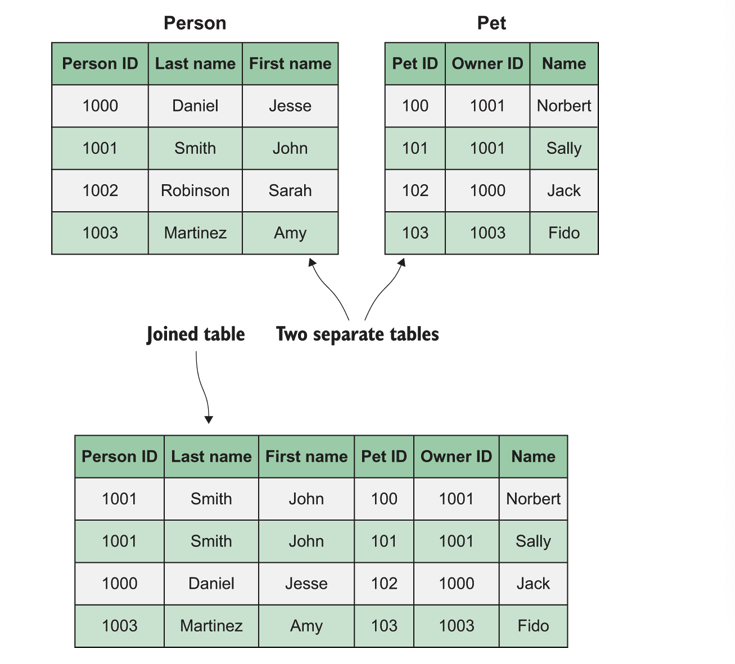

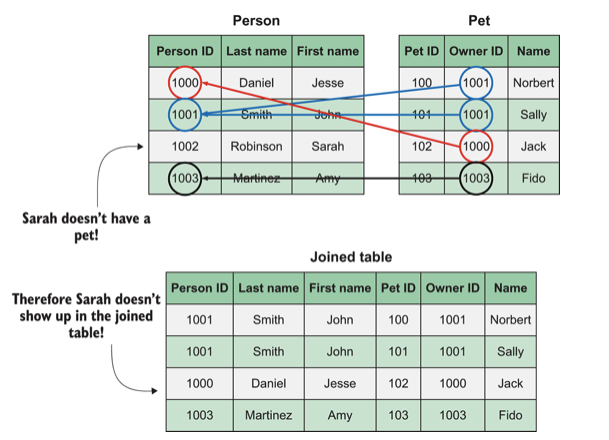

Only records between the two objects that have relationships with one another are put in the combined table.

To perform an inner join, you must specify how=inner as an argument of the join method.


**Joining 2 DataFrames**

Additional data - collected some average monthly temperature data for New York City from the National Oceanic and Atmospheric Administration (NOAA).

Add on the average monthly temperature for the month in which the citation was given. Perhaps we’ll see a trend that parking citations happen more in warm weather months when parking enforcement can hit the streets.

The average temperature data and the parking citation data are indexed by the same value (a string representation of month/year), the two datasets are index aligned and joining them will be a rather quick operation.

Can add Pandas dataframe to Dask DF, or Dask DF to Dask DF.

In [ ]:
# Listing 5.31
import pandas as pd
nyc_temps = pd.read_csv('nyc-temp-data.csv')
nyc_temps_indexed = nyc_temps.set_index(nyc_temps.monthYear.astype(str))

nyc_data_with_temps = nyc_data_new_index.join(nyc_temps_indexed, how='inner')

with ProgressBar():
    display(nyc_data_with_temps.head(15))

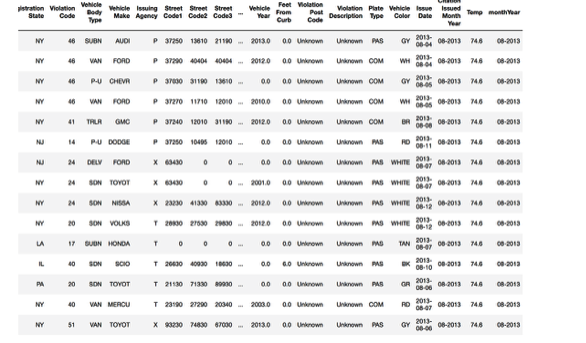

The Temp column was added to the right of the original DataFrame. We’ll keep our eye on that one as we move into the next chapter. Because the weather data overlaps the entire timeframe of the parking citation data, we didn’t lose any rows in the join process. And, because the DataFrames were index aligned, it was a very fast operation. It’s possible to join DataFrames that aren’t index aligned, but it can be so detrimental to performance

**Union 2 Dataframes without discarding rows** via outer join
- increase the number of columns if 2 tables don't have the exact columns
- may contain N/A


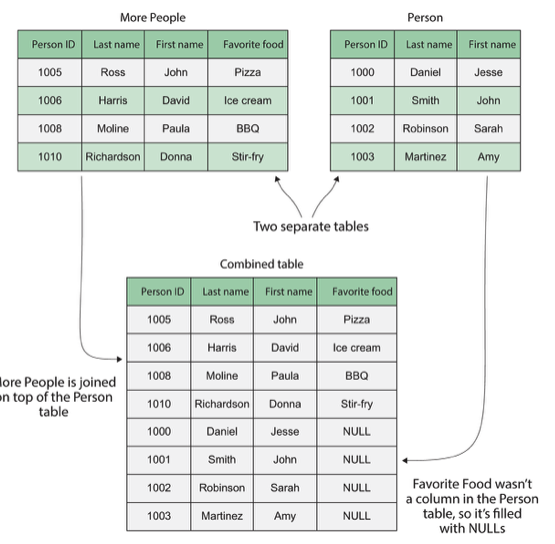

In [ ]:
# Listing 5.32 Concatenating 2 dataframes via append
fy16 = dd.read_csv('nyc-parking-tickets/Parking_Violations_Issued_-_Fiscal_Year_2016.csv', dtype=dtypes, usecols=dtypes.keys())
fy17 = dd.read_csv('nyc-parking-tickets/Parking_Violations_Issued_-_Fiscal_Year_2017.csv', dtype=dtypes, usecols=dtypes.keys())

fy1617 = fy16.append(fy17)

with ProgressBar():
    print(fy16['Summons Number'].count().compute())

with ProgressBar():
    print(fy17['Summons Number'].count().compute())

with ProgressBar():
    print(fy1617['Summons Number'].count().compute())

## Section 5.7 Writing data to text files and Parquet files

Put in a considerable amount of work to clean the dataset, it would be an opportune time to save your progress. 

While using the persist method on your DataFrames from time to time is a good idea to maximize performance, its persistence is only temporary. If you shut down your notebook server and end your Python session, the persisted DataFrames will be cleared from memory, meaning that you’ll have to re-run all the computations when you’re ready to resume working with the data.

### Section 5.7.1

While using the persist method on your DataFrames from time to time is a good idea to maximize performance, its persistence is only temporary. 

If you shut down your notebook server and end your Python session, the persisted DataFrames will be cleared from memory, meaning that you’ll 
have to re-run all the computations when you’re ready to resume working with the data.

One thing to notice is the filename we’ve given the data: part*.csv. 

The * wildcard will be filled in automatically by Dask, indicating the partition number that corresponds to that file. 

We’ve collapsed all the data together into a single partition, only one CSV file will be written, and it will be called part0.csv.

Dask is a distributed library. It makes much more sense from a performance standpoint to keep the data broken into multiple files, 
which can be read in parallel.

Write the data DataFrame to 48 files, which will be compressed using gzip, will use the pipe (|) as a column delimiter instead of the comma, 
will write any missing values as NULL, and will not write a header row or an index column. 

In [ ]:
# Listing 5.33
with ProgressBar():
    if not os.path.exists('nyc-final-csv'):
        os.makedirs('nyc-final-csv') 
    nyc_data_with_temps.repartition(npartitions=1).to_csv('nyc-final-csv/part*.csv')

In [ ]:
# Listing 5.33
with ProgressBar():
    if not os.path.exists('nyc-final-csv-compressed'):
        os.makedirs('nyc-final-csv-compressed')
    nyc_data_with_temps.to_csv(
        filename='nyc-final-csv-compressed/*', 
        compression='gzip', 
        sep='|', 
        na_rep='NULL', 
        header=False, 
        index=False)

### Listing 5.7.2 Writing to Parquet files

Writing to Parquet is very similar to writing to delimited text files. 

The key difference is that instead of specifying a scheme for individual filenames, Parquet is simply saved to a directory.

Since Parquet is best used by distributed systems, it’s not really worth it to adjust partitioning like we did when saving delimited text files.

Writing data to Parquet on a local filesystem using the snappy compression codec. It’s also possible to save to HDFS or S3 simply by using a different API.

Dask will write one Parquet file per partition.

In [ ]:
# Listing 5.35
with ProgressBar():
    nyc_data_with_temps.to_parquet('nyc_final', compression='snappy')